# Tree-Grass ecosystem analysis

**License:** CC-BY-4.0  
**Github:** [https://github.com/BenjMy/centum](https://github.com/BenjMy/centum)  
**Subject:** Tutorial
**Authors**:

Benjamin Mary
  Email: [benjamin.mary@ica.csic.es](mailto:benjamin.mary@ica.csic.es)  
  ORCID: [0000-0001-7199-2885](https://orcid.org/0000-0001-7199-2885)  
  Affiliation: ICA-CSIC
  
**Date:** 2025/01/10


:::{note} Hypothesis
Irrigated agricultural areas can be distinguished from adjacent agricultural parcels or natural areas through a sudden increase in actual evapotranspiration which cannot be explained by other factors (e.g. change in weather or vegetation cover).
:::



:::{important}

For the **delineation** we will use two types of datasets: 
- Earth Observation induced actual ET (calculated from an energy balance model): those are 3d raster datasets(x,y,time);
- Only when dealing with real datasets: irrigation district shapefiles
:::

In order to make calculation we will use the xarray datarray library. This has the advantage to allow us to read directly netcdf file format a standart for large raster images processing/storing. 

In the following we use a synthetic dataset that describe a rain event at day 3. 

In [42]:
import pooch
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [11]:
pooch_Majadas = pooch.create(
    path=pooch.os_cache("Majadas_project"),
    base_url="https://github.com/BenjMy/test_Majadas_centum_dataset/raw/refs/heads/main/",
    registry={
        "20200403_LEVEL2_ECMWF_TPday.tif": None,
        "ETa_Majadas.netcdf": None,
        "ETp_Majadas.netcdf": None,
        "CLCover_Majadas.netcdf": None,
    },
)

Majadas_ETa_dataset = pooch_Majadas.fetch('ETa_Majadas.netcdf')
Majadas_ETp_dataset = pooch_Majadas.fetch('ETp_Majadas.netcdf')
Majadas_CLC_dataset = pooch_Majadas.fetch('CLCover_Majadas.netcdf')

ETa_ds = xr.load_dataset(Majadas_ETa_dataset)
ETa_ds = ETa_ds.rename({"__xarray_dataarray_variable__": "ETa"})  # Rename the main variable to 'ETa'
CLC = xr.load_dataset(Majadas_CLC_dataset)  # Load the CLC dataset


In [10]:
ds_analysis_EO.time

<xarray.DataArray 'time' (time: 11)> Size: 88B
array([              0,               0,  86400000000000, 172800000000000,
       259200000000000, 345600000000000, 432000000000000, 518400000000000,
       604800000000000, 691200000000000, 777600000000000],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 88B 0 days 0 days 1 days ... 8 days 9 days

In [24]:
ds_analysis_EO.ETp.mean()

<xarray.DataArray 'ETp' ()> Size: 8B
array(-1.e-07)

Actual Evapotranspiration is stored with meter per second (m/s)

In [15]:
ds_analysis_EO['ACT. ETRA'].mean()

<xarray.DataArray 'ACT. ETRA' ()> Size: 8B
array(2.00931656e-09)

**Show Earth Observation time serie to analyse**

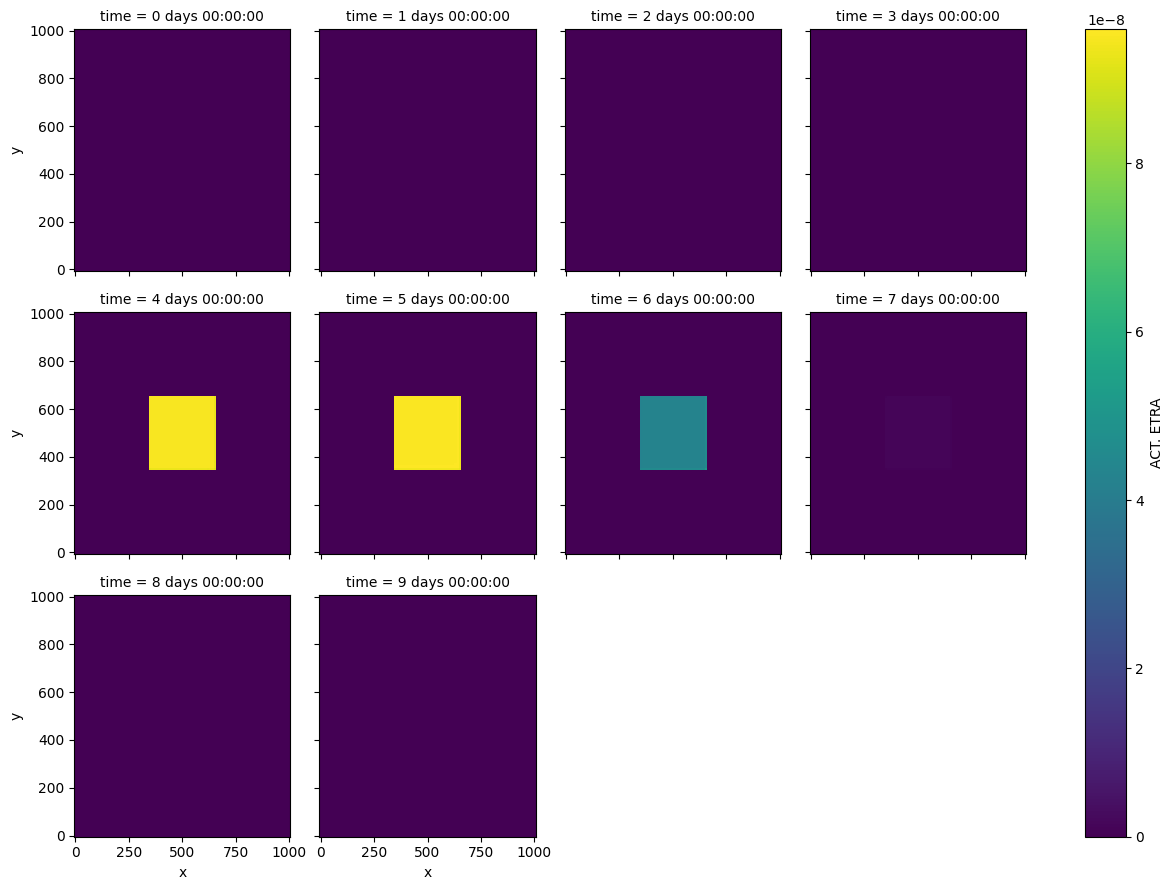

In [27]:
_, index = np.unique(ds_analysis_EO['time'], return_index=True)
ds_analysis_EO = ds_analysis_EO.isel(time=index)

ds_analysis_EO['ACT. ETRA'].plot.imshow(x="x", y="y", 
                                        col="time", 
                                        col_wrap=4,
                                        )

We can observed a change in actual ET starting from day 3

In [34]:
ds_analysis_EO

<xarray.Dataset> Size: 4MB
Dimensions:       (time: 10, x: 101, y: 101)
Coordinates:
  * time          (time) timedelta64[ns] 80B 0 days 1 days ... 8 days 9 days
  * x             (x) float64 808B 0.0 10.0 20.0 30.0 ... 980.0 990.0 1e+03
  * y             (y) float64 808B 0.0 10.0 20.0 30.0 ... 980.0 990.0 1e+03
Data variables:
    index         (time, x, y) int64 816kB ...
    time_sec      (time, x, y) float64 816kB ...
    SURFACE NODE  (time, x, y) float64 816kB ...
    ACT. ETRA     (time, x, y) float64 816kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ETp           (time, x, y) float64 816kB -1e-07 -1e-07 ... -1e-07 -1e-07

Text(0.5, 0, 'Day #')

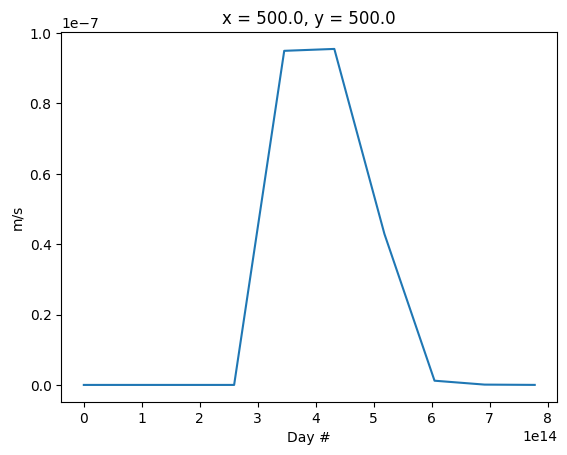

In [43]:
fig, ax = plt.subplots()
ds_analysis_EO['ACT. ETRA'].isel(x=50, y=50).plot()
ax.set_ylabel('m/s')
ax.set_xlabel('Day #')